Task - 4  Separation Data Cleaning & Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Part 1 – Basic Data Understanding (Pandas)

In [44]:
df = pd.read_csv('separated_names.csv')

df.head(10)

,id,ID,First_Name
0,12345Johnny,12345,Johnny
1,93829Sally,93829,Sally
2,20391Larry,20391,Larry
3,29324Valerie,29324,Valerie
4,43557Nina,43557,Nina
5,55027Bob,55027,Bob
6,78551Julia,78551,Julia
7,77268Nina,77268,Nina
8,19876Xander,19876,Xander
9,28290Fiona,28290,Fiona


In [45]:
df.shape

(100, 3)

In [46]:
df.columns

Index(['id', 'ID', 'First_Name'], dtype='object')

In [47]:
df.dtypes

id            object
ID             int64
First_Name    object
dtype: object

In [48]:
df.isnull().sum()

id            0
ID            0
First_Name    0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df['ID'].describe()

count      100.000000
mean     50694.190000
std      26500.870402
min      11314.000000
25%      26643.500000
50%      44728.000000
75%      74815.000000
max      95807.000000
Name: ID, dtype: float64

In [51]:
df['First_Name'].describe()

count        100
unique        28
top       Sophia
freq           8
Name: First_Name, dtype: object

Part 2 – Data Cleaning

In [52]:
print("Skewness of ID:", df['ID'].skew())

Skewness of ID: 0.20816984486531137


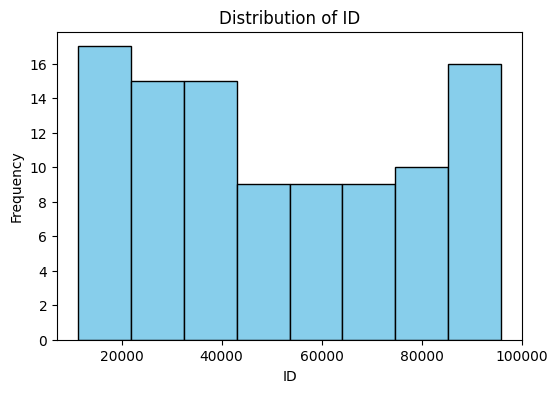

In [53]:
# Numeric column histogram
plt.figure(figsize=(6,4))
plt.hist(df['ID'], bins=8, color='skyblue', edgecolor='black')
plt.xlabel('ID')
plt.ylabel('Frequency')
plt.title('Distribution of ID')
plt.show()

In [54]:
df['ID'] = df['id'].str[:5].astype(int)
df['First_Name'] = df['id'].str[5:]

df['First_Name'] = df['First_Name'].str.strip().str.title()

print(df['ID'].is_unique)

True


Part 3 – Exploratory Data Analysis (EDA)

0    Sophia
Name: First_Name, dtype: object
28
31    95807
98    94063
1     93829
32    92910
84    92725
Name: ID, dtype: int64
11    11314
0     12345
97    12962
52    13595
27    14287
Name: ID, dtype: int64


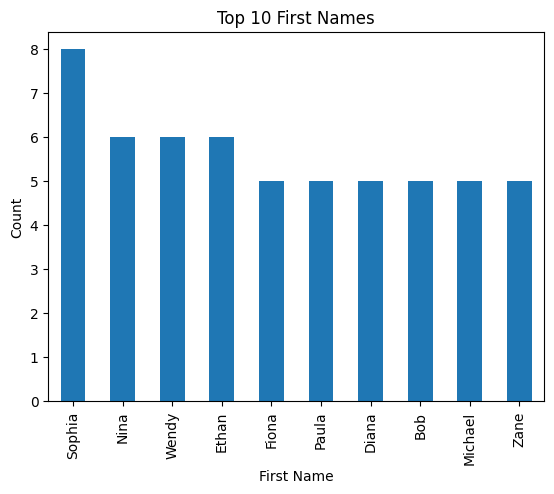

In [55]:
print(df['First_Name'].mode())

print(df['First_Name'].nunique())

print(df['ID'].nlargest(5))

print(df['ID'].nsmallest(5))

df['First_Name'].value_counts().head(10).plot(kind='bar')
plt.xlabel('First Name')
plt.ylabel('Count')
plt.title('Top 10 First Names')
plt.show()

Part 4 – Statistics

In [56]:
print("Mean : ",df['ID'].mean())

print("Median : ",df['ID'].median())

print("Variance : ",df['ID'].var())

print("Standard Deviation : ",df['ID'].std())

print("P(ID > 50000): ", (df['ID'] > 50000).mean())

print("P(Name starts with A): ", df['First_Name'].str.startswith("A").mean())

print("percentage of Names > 5 letters: ", (df['First_Name'].str.len() > 5).mean() * 100)

Mean :  50694.19
Median :  44728.0
Variance :  702296132.0746465
Standard Deviation :  26500.870402208424
P(ID > 50000):  0.45
P(Name starts with A):  0.04
percentage of Names > 5 letters:  33.0


Part 5 – Linear Algebra & NumPy

In [57]:
ID_array = df['ID'].to_numpy()

score_array = np.random.randint(1, 100, size=len(df))

print("Addition:", ID_array + score_array)
print("Subtraction:", ID_array - score_array)

print("Dot Product:", np.dot(ID_array, score_array))

features = np.column_stack((ID_array, score_array))
weights = np.array([0.3, 0.7])
result = features @ weights
print("Matrix Multiplication Result:", result)

Addition: [12438 93835 20407 29335 43572 55098 78581 77359 19915 28382 38901 11377
 90430 79595 25804 31839 34213 47707 31527 27600 15302 87361 87536 18386
 19073 20297 82766 14371 92098 70817 17608 95818 92994 36426 15133 58094
 72481 61809 45607 42161 81619 26716 53380 73662 66405 90113 46884 90383
 62392 74976 24447 40003 13691 66360 36550 81684 46445 22540 81856 82139
 22235 63353 60512 60597 32857 26696 65329 36867 43002 32587 25269 65324
 88610 89535 17630 41473 27532 17381 25070 39382 40214 22440 71106 58309
 92797 16143 36908 87911 74849 85507 43949 89724 49964 42885 68549 58437
 43118 13057 94156 17124]
Subtraction: [12252 93823 20375 29313 43542 54956 78521 77177 19837 28198 38881 11251
 90282 79549 25624 31789 34055 47601 31361 27452 15276 87273 87414 18274
 18921 20185 82578 14203 91984 70625 17460 95796 92826 36286 15119 58070
 72417 61751 45459 42109 81467 26574 53198 73642 66323 90083 46756 90363
 62336 74846 24413 39909 13499 66268 36498 81640 46371 22402 81704 82119
 2

Part 6 – Feature Engineering

In [58]:
df['Name_Length'] = df['First_Name'].str.len()
print(df['Name_Length'])

df['Starts_With_Vowel'] = df['First_Name'].fillna('').str[0].str.upper().isin(['A','E','I','O','U']).astype(int)
print(df['Starts_With_Vowel'])

df['High_ID'] = (df['ID'] > 50000).astype(int)
print(df['High_ID'])

df['Length_Quartile'] = pd.qcut(df['Name_Length'], 4, labels=False, duplicates='drop')
print(df['Length_Quartile'])

0     6
1     5
2     5
3     7
4     4
     ..
95    3
96    5
97    5
98    3
99    7
Name: Name_Length, Length: 100, dtype: int64
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    0
98    1
99    0
Name: Starts_With_Vowel, Length: 100, dtype: int64
0     0
1     1
2     0
3     0
4     0
     ..
95    1
96    0
97    0
98    1
99    0
Name: High_ID, Length: 100, dtype: int64
0     1
1     0
2     0
3     2
4     0
     ..
95    0
96    0
97    0
98    0
99    2
Name: Length_Quartile, Length: 100, dtype: int64


Part 7 – SQL Simulation in Pandas

In [59]:
vowel_highID = df[(df['Starts_With_Vowel'] == 1) & (df['High_ID'] == 1)]
print(vowel_highID)

top_10_IDs = df.sort_values('ID', ascending=False).head(10)
print(top_10_IDs[['ID', 'First_Name']])

group_count = df.groupby('Starts_With_Vowel').size()
print(group_count)

sorted_df = df.sort_values(['Name_Length', 'ID'], ascending=[False, True])
print(sorted_df[['ID','First_Name','Name_Length']])

            id     ID First_Name  Name_Length  Starts_With_Vowel  High_ID  \
35    58082Uma  58082        Uma            3                  1        1   
37  61780Ethan  61780      Ethan            5                  1        1   
72  88577Ethan  88577      Ethan            5                  1        1   
73  89466Ethan  89466      Ethan            5                  1        1   
95    58388Ian  58388        Ian            3                  1        1   
98    94063Uma  94063        Uma            3                  1        1   

    Length_Quartile  
35                0  
37                0  
72                0  
73                0  
95                0  
98                0  
       ID First_Name
31  95807     Xander
98  94063        Uma
1   93829      Sally
32  92910     Sophia
84  92725       Nina
28  92041     Sophia
47  90373    Michael
12  90356      Paula
45  90098     Hannah
91  89694      Fiona
Starts_With_Vowel
0    83
1    17
dtype: int64
       ID First_Name  Name_L

Part 8 – Insights

In [60]:
print("Most Frequent Name:", df['First_Name'].mode()[0])

print("Average ID:", df['ID'].mean())

corr = df['ID'].corr(df['Name_Length'])
print("Correlation (ID vs Name_Length):", corr)
if corr > 0.3:
    print("Trend: Positive → Larger IDs tend to have longer names")
elif corr < -0.3:
    print("Trend: Negative → Larger IDs tend to have shorter names")
else:
    print("Trend: No clear relationship between ID size and name length")

print("Quartile with longest average IDs:", df.groupby('Length_Quartile')['ID'].mean().idxmax())

Most Frequent Name: Sophia
Average ID: 50694.19
Correlation (ID vs Name_Length): -0.02587516459648293
Trend: No clear relationship between ID size and name length
Quartile with longest average IDs: 1


In [61]:
df.head()

,id,ID,First_Name,Name_Length,Starts_With_Vowel,High_ID,Length_Quartile
0,12345Johnny,12345,Johnny,6,0,0,1
1,93829Sally,93829,Sally,5,0,1,0
2,20391Larry,20391,Larry,5,0,0,0
3,29324Valerie,29324,Valerie,7,0,0,2
4,43557Nina,43557,Nina,4,0,0,0


   Starts_With_Vowel  High_ID  Name_Length
0                  0        0     5.386364
1                  0        1     5.102564
2                  1        0     4.272727
3                  1        1     4.000000


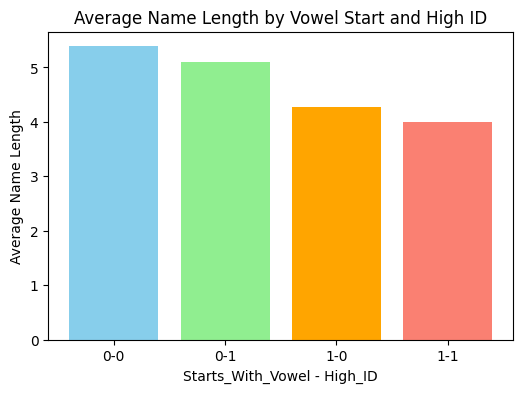

In [62]:
grouped = df.groupby(['Starts_With_Vowel', 'High_ID'])['Name_Length'].mean().reset_index()
print(grouped)

plt.figure(figsize=(6,4))
plt.bar(x=[f"{a}-{b}" for a,b in zip(grouped['Starts_With_Vowel'], grouped['High_ID'])], height=grouped['Name_Length'], color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.xlabel('Starts_With_Vowel - High_ID')
plt.ylabel('Average Name Length')
plt.title('Average Name Length by Vowel Start and High ID')
plt.show()